In [1]:
from sympy.solvers import solve
from sympy import Symbol, simplify#, abs
from cmath import phase
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

Ohm's Law: linear relation between current and voltage <br>
Kirchhoff's Law: Sum of I_incoming = Sum of I_outgoing (charge conservation) <br>
Kirchhoff's Law: Partial V drops across each element add up to the total voltage over the path

In complex-valued fxn: w = phase difference (how much the current oscillation differs from voltage oscillation) <br>
Only real part has physical meaning. Phase relations are easy to formulate in complex notation.

V0 = IZ0, Z = R, Z = 1/(iwC), Z = iwL

In [3]:
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic")
il = Symbol("il")
r = Symbol("r")
omega = Symbol("omega")
c = Symbol("c")
l = Symbol("l")

In [4]:
#L-C Oscillatory Circuit
eq1 = (vr + vo - 1,
 ir - ic - il,
 vr - ir*r,
 vo - ic/(1j*omega*c),
 vo - 1j*omega*l*il)
#after the transient, ir, ic, and il have the same frequency as the input voltage
#independent of R: vo reaches max at w = 1/sqrt(LC) where impedance is inf

In [5]:
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = simplify(sol[vo])
print(vos) #simplified to get a more precise result
print(sol[vo])

l*omega/(I*c*l*omega**2*r + l*omega - I*r)
l*omega/(I*c*l*omega**2*r + l*omega - I*r)


In [7]:
numvalue = {c: 10**-6, l: 10**-3}
vosnum = vos.subs(numvalue) #substitute c and l numvalue
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)] #substitute different r
omega_axis = np.linspace(20000, 43246, 500) #frequency list
vos_axis1 = [[abs(f.subs({omega: o})) for o in omega_axis] #every flist, substitute omega_axis 
                                            for f in flist]
vos_axis2 = [[phase(f.subs({omega: o})) for o in omega_axis] 
                                            for f in flist]

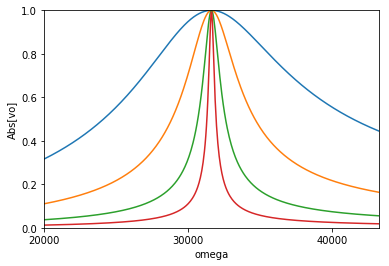

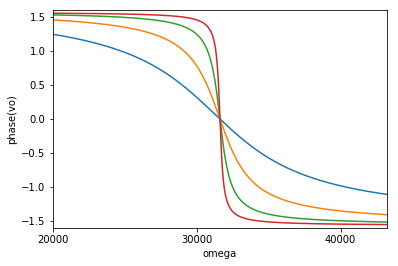

In [8]:
for i in range(4):
    plt.plot(omega_axis, vos_axis1[i])
plt.xlim(20000, 43246)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks([20000, 30000, 40000])
plt.show()

#red 2700, green 900, orange 300, blue 100

for i in range(4):
    plt.plot(omega_axis, vos_axis2[i])
plt.xlim(20000, 43246)
plt.ylim(-1.6, 1.6)
plt.xlabel('omega')
plt.ylabel('phase(vo)')
plt.yticks(np.linspace(-1.5,1.5,7))
plt.xticks([20000, 30000, 40000])
plt.show()
#red 2700, green 900, orange 300, blue 100

# resonant f = 1/sqrt(LC) = 31622.8 s^(-1) 
# for r = 0: vo = 1
# as r > inf: a sharp voltage maximum appears at resonant f

# at resonant f: phase varies from pi/2 to -pi/2

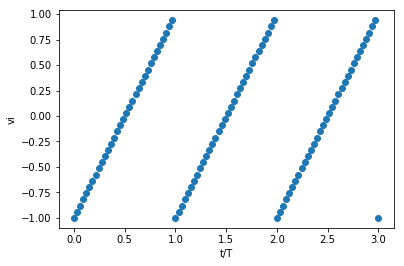

In [19]:
def vsaw(t, T=1.0): 
    return 2*((t/T)%1)-1 
# arbitrary periodic input signal 
# linear network: superporistion of input signals > superposition of output signals
t = np.linspace(0,3,100)
plt.plot(t,vsaw(t),'o')
plt.xlabel('t/T')
plt.ylabel('vi')
def square(t,T=1,A=1):
    return A*signal.square(2 * np.pi * T * t)
# sawtooth v: depends on sharpness of the resonanze at resonant f and ratio of the fundamental frequency

In [22]:
omegares = 1./np.sqrt(np.prod(list(numvalue.values()))) 
#numpy.prod = Return the product of array elements over a given axis.
#.values() = returns a list of all the values available in a given dictionary
alist = square(np.arange(256)/256.0)/np.sqrt(256) #we probe saw tooth V at N = 256 #discrete voltage values
blist = np.sqrt(256) * np.fft.fft(alist) 


f = 1 and R = 2700
0.00019869176531592202


C:\Users\Mary\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


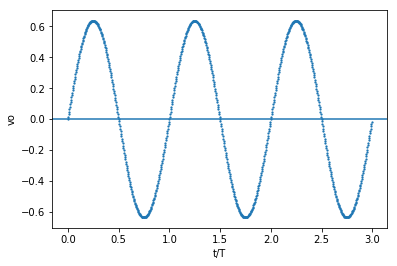

f = 1/3 and R = 200
0.0005960752959477661


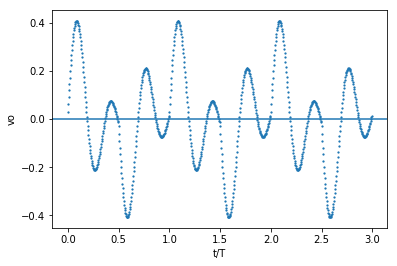

f = 3 and R = 5
6.623058843864066e-05


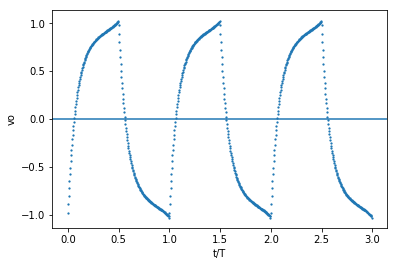

In [23]:
def plot3(fac, w): #frequency, r
    omegai = fac * omegares 
    # T is parametrized: fac = ratio of input fundamental frequency(2pi/T) to resonant frequency (omegares)
    # How were the limits of arange() in the following line chosen?
    print(2*np.pi/omegai)
    volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s, r:w}).evalf()) for s in np.arange(1, 129)],
                             [0.0],
                             [complex(vosnum.subs({omega: omegai*s, r:w}).evalf()) for s in np.arange(-127, 0)]))
    #np.concatenate = join a sequence of arrays along an existing axis.
    #print(volist)
    vtrans = np.fft.ifft(blist * volist) #output signal
    plotlist = np.array([[(k)/256., vtrans[k%256]] for k in range(768)]) # 0 to 255 > 0 to 255 > 0 to 255
    #256*3=768 for plot with yvalues 0to3
    plt.scatter(plotlist[:,0], plotlist[:,1],s=1.5)
    plt.axhline(0) # adds line at y = 0
    plt.xlabel('t/T')
    plt.ylabel('vo')
    plt.show()

print('f = 1 and R = 2700') # narrow resonance curve
plot3(1, 2700.0) # filter converts the sawtooth shaped oscillation to a sinusoidal oscillation
print('f = 1/3 and R = 200') #f < 1/2 and r = 200
plot3(1/3., 200.0) # multiple of 2pi/T closest to resonant freq are filtered out
print('f = 3 and R = 5') #f > 1 and broad resonance curve
plot3(3.0, 5.0) #distorted copy of the input signal

In [13]:
# Series connection of R-C-L combination and L-C oscialltory ciruit
eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq2, (vo,ir))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
power = (r**2) *(abs(irs)**2)
flist3 = [abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
            for s in range(0, 3)]
omega_axis2 = np.linspace(10000, 70000, 500)
vos_axis3 = [[f.subs({omega: o}) for o in omega_axis2] 
                                for f in flist3]

#C-L in series: Z is minimal and Vo is max at w = 1/sqrt(LC) = 31622.8 s^(-1) 

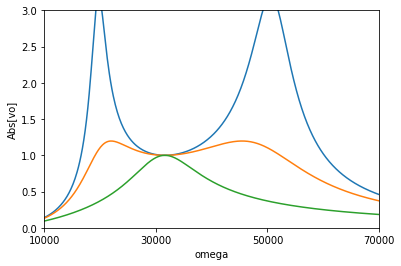

In [46]:
for i in range(3):
    plt.plot(omega_axis2, vos_axis3[i])
plt.xlim(10000, 70000)
plt.ylim(0, 3)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks(range(10000, 80000, 20000))
plt.show()
# For small R: Vo becomes much larger than Vi
# r = 10 blue, 30 orange, 90 green
# r = 0, circuit is loss free. Denominator of vo vanishes at w = sqrt((3 +- sqrt(5))/2LC)
# vo diverges at omega = 19544 and 51 166.7 s^(-1)
# resonances are visible only if r is small

# estimated resonances w_1 = 1/sqrt(2LC) = 22360 and w_2 = sqrt(2/(LC)) = 44720 are not correct
# For low w: behavior of the parallel circuit is dominated by inductance.
# Neglecting C in parallel ciruit gives R-C-L-L series connection
# Overall inductance is 2L > w = 1/sqrt(2LC)
#For high w:  only capacitance in the parallel is considered.
# gives R-C-L-C series connection with total capacitance of C/2
#w = sqrt(1/(LC))

# For any r, at w = 1/sqrt(LC), vo (output) = vi (input)

In [63]:
def power(ir,r): #power that is converted to heat by R at w
    return (r/2) *(abs(ir)**2)/(1/(2*r)) #Po: coil and capacitors in network are short circuited
# Vi is connected directly to R so Ir = Vi/R
eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq2, (vo,ir))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
flist5 = abs(irs.subs(numvalue).subs({r: 10.0})) 
omega_axis2 = np.linspace(10000, 70000, 100)
ir= np.array([flist5.subs({omega: o}) for o in omega_axis2])

Power dissipated in the ohmic resistance R = 10 relative to Power Po dissipated if Vin is connected directly to R. 


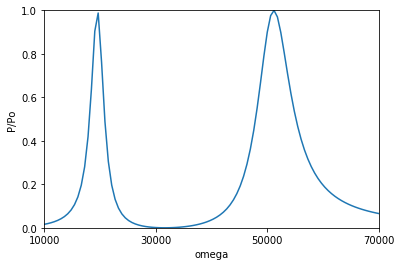

In [64]:
plt.plot(omega_axis2, power(ir,10.0))
plt.xlim(10000, 70000)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('P/Po')
plt.xticks(range(10000, 80000, 20000))
print('Power dissipated in the ohmic resistance R = 10 relative to Power Po dissipated if Vin is connected directly to R. ')
plt.show() 
#At both resonant w: coils and capacitors appear to be conductive
#At w = 1/sqrt(LC): parallel circuit offers an inf resistance